# TP 1 - Méthode des élémenst finis en 1D

In [4]:
%matplotlib inline
%autosave 60
import numpy as np
import scipy as sp
#import scipy.optimize as opt
import matplotlib.pyplot as plt

Autosaving every 60 seconds



## Introduction

Dans ce *notebook*, nous allons étudier par la méthode des éléments fini en *1D* les **éfforts de traction** sur une poutre en rotation.
Pour se faire, nous allons partir de **l'équation d'équilibre** et des conditions aux limites et donner **la formulation faible** du problème.
On étudira une approximation de la solution dans le cas ou la solution est un **polynome d'odre 1** et dans le cas où il est **d'odre 2**.

## Problème Physique

### Equation d'équilibre

Un petit élément $\Delta r$ est soumis à :
1. Force centrifuge : $(\rho*S(r)*\omega^2*r)*\Delta r$
2. Efforts internes : $ES(r+\Delta r)\frac{du}{dr}|_{r+\Delta r}-ES(r)\frac{du}{dr}|_{r}=\frac{d}{dr}*[ES(r)\frac{du}{dr}]$

Soit l'équation d'équilibre suivante :
$$\frac{d}{dr}(ES(r)\frac{du}{dr})+(\rho S(r)\omega^2)r =0$$

### Formulation faible

On retrouve cette formulation faible :

**Trouver $u(r)$ tel que $u(0)=0$ et $ES(r)\frac{du}{dr}\Big|_{r=L}=0$ :
$$\int_0^L \!ES(r)\frac{du}{dr}~dr=\int_0^L \! (\rho S(r)\omega^2r)v(r)~dr$$**

### solution Analytique

#### Cas Section Constante

On retrouve pour une section constrante une solution :
$$u(r)_{Sconst}=\frac{\rho \omega^2}{2*E}\big(L^2 r-\frac{r^3}{3}\big)$$

#### Cas Section fonction de r 
Pour une section S fonction de r : $s=s(r)=a*r+b$ avec $a=\frac{S(L)-S(0)}{L}$ et $b=S(0)$

Avec les condition limites:
$$u(0)=0$$
$$\frac{du}{dr}\Big|_{r=L}=0$$
On trouve une solution analytique :

$$u(r)_{S(r)}=\frac{\omega^2 \rho}{36a^3E}\Big( ar(-4a^2r^2-3abr+6b^2)-6(b-2aL)(aL+b)^2\ln(ar+b)+6\ln(b)(b-2aL)(aL+b)^2 \Big)$$

Résolu avec Wolfram : [This link](https://goo.gl/IB3dHC)

## Approximation par éléments finis

### Forme de l'approximation dans un maillage

Pour un maillage $M^h$ nous avons une aproximation sur un élément $k$ de la forme :
$$u^h_{k}=\Big(\frac{U(r_{k})-U(r_{k-1})}{r_{k}-r_{k-1}}\Big)r+(\frac{r_{k}U(r_{k-1})-r_{k-1}U(r_{k})}{r_{k}-r_{k-1}}\Big)$$

### Matrice A*T=B
question 2 et 3

## Programme
### Fonctions basique

Ici, nous avons programmer la fonction relative à la section $S$, ainsi que les deux fonction d'assemblage de $A$ et $B$.
Nous avons aussi programmé la fonction de la solution analytique.

In [5]:
def section(L,N,k,S0,SL): #Foction S(r)
    a=(SL-S0)/L
    b=S0
    return ((a*(L/N)*(k-1)+b)+a*(L/N)*k+b)/2


def matrixA(E,L,N,S0,SL): #Algorithme de construction de la Matrice A
    A=np.zeros((N+1,N+1))
    h=L/N
    S1=section(L,N,1,S0,SL)
    SN=section(L,N,N,S0,SL)
    A[0,0]= (E*S1)/h
    A[0,1]= -(E*S1)/h
    A[1,0]= -(E*S1)/h
    A[1,1]= (E*S1)/h
    i=1
    while i<N:
        S=section(L,N,i,S0,SL)
        A[i,i]=A[i,i]+(E*S)/h
        A[i,i+1]=-(E*S)/h
        A[i+1,i]=-(E*S)/h
        A[i+1,i+1]=(E*S)/h
        i=i+1
    return A

def vecteurB(rho,omega,N,S0,SL): #Algorithme de construction du vecteur B
    B=np.zeros(N+1)
    h=L/N
    S1=section(L,N,1,S0,SL)
    SN=section(L,N,N,S0,SL)
    R=1*L/N #k-0=0 donc r1
    B[0]=rho*omega*omega*S1*h*(R/3)
    B[1]=rho*omega*omega*S1*h*(R/6)
    i=1
    while i<N:
        R1=i*L/N
        R2=(i+1)*L/N
        S=section(L,N,i,S0,SL)
        B[i]=B[i]+rho*omega*omega*S*h*(R1/3+R2/6)
        B[i+1]=rho*omega*omega*S*h*(R1/3+R2/6)
        i=i+1
    return B

def u(E,L,rho,omega,N,S0,SL,r): #Solution analytique pour S variable.
    a=(SL-S0)/L
    b=S0
    y=((omega**2*rho)/(36*E*a**3))*(a*r*(-4*a**2*r**2-3*a*b*r+6*b**2)-6*(b-2*a*L)*((a*L+b)**2)*np.log(a*r+b)+6*np.log(b)*(b-2*a*L)*(a*L+b)**2)
    return y

## Etude numérique

Dans cette partie nous avons rentré nos paramètres et nous avons dessiné les courbes souhaitées.
### Paramètres du problème:

In [6]:
#Paramettre du problème:
S0=16.2
SL=6.7
L=51.5
err=0.076
rho=1600
E=21300*10**6
omega=2*np.pi
N=5 # Première étude avec N=5

### Etude pour N=5:
#### Solution Approchée

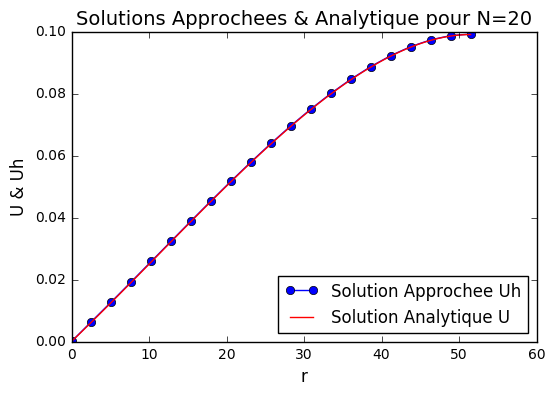

In [14]:
A=matrixA(E,L,N,S0,SL)
B=vecteurB(rho,omega,N,S0,SL)
#Condition limite:
A[0,0]=1
A[0,1]=0
B[0]=0
uh=np.linalg.solve(A,B) #Resolution du sytème : solution approchée pour N=5

x=np.linspace(0,L,100) #Axe horizontale pour la solution analytique
r=np.linspace(0,L,N+1) #Array avec tout les noeuds en fonction de N
u5=u(E,L,rho,omega,N,S0,SL,x)

p1=plt.plot(r,uh,marker='o',label='Solution Approchee Uh')
plt.plot(x,u(E,L,rho,omega,N,S0,SL,x),'r',label='Solution Analytique U')
plt.legend(loc='lower right')
plt.xlabel('r',fontsize=12)
plt.ylabel('U & Uh',fontsize=12)
plt.title("Solutions Approchees & Analytique pour N="+str(N), fontsize=14)
plt.savefig('D:\TP1\U Uh N5.png',dpi=800)

#### Calcul de l'erreur relative pour N=5:

On va calculer l'erreur relative sur chaque point de la solution approchée, dans le cas de N=5.

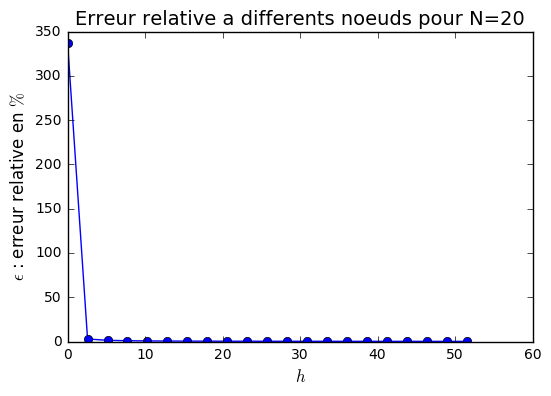

In [15]:
ur=u(E,L,rho,omega,N,S0,SL,r) #On calcul les valeurs théoriques pour diférents noeuds (array "r")
error=np.absolute(ur-uh)/ur #formule pour chaque point

plt.plot(r,error*100,marker='o') #pourcentage
plt.ylabel('$\epsilon$ : erreur relative en $\%$',fontsize=12)
plt.xlabel('$h$',fontsize=12)
plt.title("Erreur relative a differents noeuds pour N="+str(N), fontsize=14)
plt.savefig('D:\TP1\Erreur relative N5.png',dpi=800) 

## Calcul avec différents maillages:

Ici, nous avons impleménté une boucle afin de tracer l'approximation avec un nombre de neus $N$ croissant.

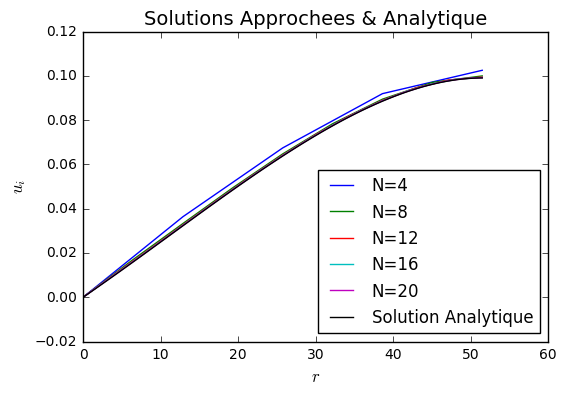

In [17]:
#Paramettre du problème:
S0=16.2
SL=6.7
L=51.5
err=0.076
rho=1600
E=21300*10**6
omega=2*np.pi
Nmin=4 #nombre de noeud minimal
Nmax=20 #nombre de noeud maximal

for i in range (Nmin,Nmax+1,4):
    N=i
    x=np.linspace(0,L,100)
    r=np.linspace(0,L,N+1)
    A=matrixA(E,L,N,S0,SL)
    B=vecteurB(rho,omega,N,S0,SL)
    #Condition limite:
    A[0,0]=1
    A[0,1]=0
    B[0]=0
    uh=np.linalg.solve(A,B)
    plt.plot(r,uh,label='N='+str(N),)
plt.plot(x,u2(E,L,rho,omega,N,S0,SL,x),'k',label='Solution Analytique')
plt.legend(loc='lower right')
plt.xlabel('$r$',fontsize=12)
plt.ylabel('$u_{i}$',fontsize=12)
plt.title("Solutions Approchees & Analytique", fontsize=14)
plt.savefig('D:\TP1\Solutions Approchees & Analytique.png',dpi=800)

## Erreur Relative en fonction de H

Dans cette partie nous avons calculé et tracé l'érreur relative en fonction de l'évolution de $h$, c'est a dire en fonction du nombre de noeud.
L'érreur relative a été calculé au noeud $r_{n}=L$.

$$Err = \frac{||u-u_{h}||}{||u||}$$

In [19]:
error=np.zeros(Nmax)
H=np.zeros(Nmax)
for i in range (Nmin,Nmax):
    N=i
    h=L/N
    x=np.linspace(0,L,100)
    r=np.linspace(0,L,N+1)
    A=matrixA(E,L,N,S0,SL)
    B=vecteurB(rho,omega,N,S0,SL)
    #Condition limite:
    A[0,0]=1
    A[0,1]=0
    B[0]=0
    uh=np.linalg.solve(A,B)
    u=u2(E,L,rho,omega,N,S0,SL,r)
    error[i-Nmin]=(np.absolute(u[N]-uh[N])/u[N])
    H[i-Nmin]=h
plt.plot(H,error*100,label='$Err(h)$')
plt.ylabel('$\epsilon$ : erreur relative en $\%$',fontsize=12)
plt.xlabel('h',fontsize=12)
plt.title("Erreur relative au noeud $r_{n}=L$", fontsize=14)
plt.savefig('D:\TP 1\Erreur relative fct de h.png',dpi=800) 

TypeError: 'numpy.ndarray' object is not callable

In [20]:
#Junk

# def errorU(E,L,rho,omega,N,S0,SL):
#     i=0
#     rk=0
#     error=np.zeros(N+1)
#     while rk<=L:
#         rk=i*L/N
#         u=u2(E,L,rho,omega,N,S0,SL,rk)
#         error[i]=np.absolute(u-uh[i])/(u)
#         i=i+1
#     return error

# def u2(E,L,rho,omega,N,S0,SL,x): #S variable
#     a=(SL-S0)/L
#     b=S0
#     c1=(a*L+b)*((rho*(omega**2)*(b**2))/(36*E*a**2)-(rho*(omega**2)*(b*L))/(36*E*a)-(rho*(omega**2)*(L**2))/(18*E*a))
#     y=((rho*(omega**2)*(b**2)*x)/(6*E*a**2)-(rho*(omega**2)*(b*x**2))/(12*E*a)-(rho*(omega**2)*(x**3)/(9*E))-(c1*np.log(a*x+b))/(6*a)) 
#     return y

#Solution analytique
# def u1(E,L,rho,omega,N,S0,SL,r): #S constant
#     y=((rho*omega**2*r)*(L**2-(r**2)/3))/(E*2)
#     return y